In [66]:
%matplotlib inline
import pandas as pd
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
%cd pandas_data_files/

/Users/jimdoone/Desktop/pandas_data_files


In [70]:
%ls

Baby_Names.xlsx                       employees.csv
Data - Multiple Worksheets.xlsx       foods.csv
Data - Single Worksheet.xlsx          fortune1000.csv
Restaurant - Customers.csv            google_stock_price.csv
Restaurant - Foods.csv                nba.csv
Restaurant - Week 1 Sales.csv         pokemon.csv
Restaurant - Week 1 Satisfaction.csv  quarters.csv
Restaurant - Week 2 Sales.csv         revenue.csv
bigmac.csv                            salesmen.csv
chicago.csv                           worldstats.csv
ecommerce.csv


In [71]:
pd.set_option('display.max_rows', 8)
df = pd.read_csv('employees.csv')
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
...,...,...,...,...,...,...,...,...
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


In [72]:
df['Senior Management'] = df['Senior Management'].astype('bool')
df['Gender'] = df['Senior Management'].astype('category')
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,True,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,True,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,False,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,True,3/4/2005,1:00 PM,138705,9.340,True,Finance
...,...,...,...,...,...,...,...,...
996,Phillip,False,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,False,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,False,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,True,5/15/2012,6:24 PM,129949,10.169,True,Sales


In [73]:
df.sort_values('First Name', inplace=True)

In [74]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
101,Aaron,True,2/17/2012,10:20 AM,61602,11.849,True,Marketing
327,Aaron,True,1/29/1994,6:48 PM,58755,5.097,True,Marketing
440,Aaron,True,7/22/1990,2:53 PM,52119,11.343,True,Client Services
937,Aaron,False,1/22/1986,7:39 PM,63126,18.424,False,Client Services
...,...,...,...,...,...,...,...,...
925,NaN,True,8/23/2000,4:19 PM,95866,19.388,True,Sales
946,NaN,True,9/15/1985,1:50 AM,133472,16.941,True,Distribution
947,NaN,True,7/30/2012,3:07 PM,107351,5.329,True,Marketing
951,NaN,True,9/14/2010,5:19 AM,143638,9.662,True,NaN


##### keep = argument will return NOT consider the first value a duplicate, ONLY duplicated values after

In [75]:
df['First Name'].duplicated()

101    False
327     True
440     True
937     True
       ...  
925     True
946     True
947     True
951     True
Name: First Name, Length: 1000, dtype: bool

##### Mask the duplicates and return a df with only the duplicated values

In [76]:
df[df['First Name'].duplicated()]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
327,Aaron,True,1/29/1994,6:48 PM,58755,5.097,True,Marketing
440,Aaron,True,7/22/1990,2:53 PM,52119,11.343,True,Client Services
937,Aaron,False,1/22/1986,7:39 PM,63126,18.424,False,Client Services
141,Adam,True,12/24/1990,8:57 PM,110194,14.727,True,Product
...,...,...,...,...,...,...,...,...
925,NaN,True,8/23/2000,4:19 PM,95866,19.388,True,Sales
946,NaN,True,9/15/1985,1:50 AM,133472,16.941,True,Distribution
947,NaN,True,7/30/2012,3:07 PM,107351,5.329,True,Marketing
951,NaN,True,9/14/2010,5:19 AM,143638,9.662,True,NaN


##### Duplicated Columns

In [77]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False], dtype=bool)

##### Drop Duplicates
##### subset() pass thru column(s)

In [78]:
df.drop_duplicates(subset=['First Name'], keep = 'first')

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
101,Aaron,True,2/17/2012,10:20 AM,61602,11.849,True,Marketing
137,Adam,False,5/21/2011,1:45 AM,95327,15.120,False,Distribution
300,Alan,True,6/26/1988,3:54 AM,111786,3.592,True,Engineering
372,Albert,True,2/1/1997,4:20 PM,67827,19.717,True,Engineering
...,...,...,...,...,...,...,...,...
177,Wayne,True,4/7/2012,8:00 AM,102652,14.085,True,Distribution
820,William,True,11/18/1993,12:27 PM,54058,5.182,True,Human Resources
450,Willie,False,8/22/2009,1:03 PM,55038,19.691,False,Legal
7,NaN,True,7/20/2015,10:43 AM,45906,11.598,True,Finance


##### If keep = False then all duplicates will be dropped

In [79]:
df.drop_duplicates(subset=['First Name'], keep = False)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
8,Angela,True,11/22/2005,6:29 AM,95570,18.523,True,Engineering
688,Brian,True,4/7/2007,10:47 PM,93901,17.821,True,Legal
190,Carol,False,3/19/1996,3:39 AM,57783,9.129,False,Finance
887,David,False,12/5/2009,8:48 AM,92242,15.407,False,Legal
...,...,...,...,...,...,...,...,...
495,Eugene,False,5/24/1984,10:54 AM,81077,2.117,False,Sales
33,Jean,False,12/18/1993,9:07 AM,119082,16.180,False,Business Development
832,Keith,False,2/12/2003,3:02 PM,120672,19.467,False,Legal
291,Tammy,True,11/11/1984,10:30 AM,132839,17.463,True,Client Services


In [80]:
data = df[['Salary', 'Bonus %']]

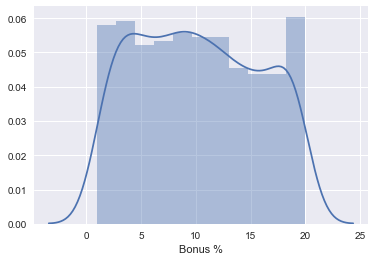

In [81]:
sns.distplot(data['Bonus %'])

In [82]:
skewness = data.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
data[skewed_features] = np.log1p(data[skewed_features])

0 skewed numerical features to log transform


In [84]:
df_cat = pd.get_dummies(df['Team'])

In [86]:
df_cat

,Business Development,Client Services,Distribution,Engineering,Finance,Human Resources,Legal,Marketing,Product,Sales
101,0,0,0,0,0,0,0,1,0,0
327,0,0,0,0,0,0,0,1,0,0
440,0,1,0,0,0,0,0,0,0,0
937,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
925,0,0,0,0,0,0,0,0,0,1
946,0,0,1,0,0,0,0,0,0,0
947,0,0,0,0,0,0,0,1,0,0
951,0,0,0,0,0,0,0,0,0,0
